In [1]:
import os
import sys
mod_path = os.path.abspath(os.path.join('..'))
if mod_path not in sys.path:
    sys.path.append(mod_path)

In [2]:
from pprint import pprint as pp
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif

In [3]:
from tools.feature_format import featureFormat, targetFeatureSplit
from final_project.tester import dump_classifier_and_data

In [4]:
pwd_ = %pwd
pwd_ = Path(pwd_)
pwd_.joinpath('tools/feature_format.py')

WindowsPath('E:/Users/Trenton J. McKinney/PycharmProjects/ud120-projects/tools/feature_format.py')

# Task 1: Select Features
#### features_list is a list of strings, each of which is a feature name.
#### The first feature must be "poi".

In [5]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                      'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
                      'long_term_incentive', 'restricted_stock', 'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

poi_label = ['poi']

In [6]:
feature_list = []
feature_list.extend(poi_label)
feature_list.extend(financial_features)
feature_list.extend(email_features)
feature_list

['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'to_messages',
 'email_address',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi']

In [7]:
len(feature_list)

21

## Load Dataset

In [8]:
# Load the dictionary containing the dataset
with open('final_project/final_project_dataset_unix.pkl', 'rb') as data_file:
    data_dict = pickle.load(data_file)

## Explore Dataset

In [9]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.loc[:,feature_list]
df = df.replace('NaN', np.nan)  # can't use the isnull method with 'NaN'
pd.set_option('max_rows', 150)
pd.set_option('max_columns', 21)
df.head(7)

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,email_address,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,False,201955.0,2869717.0,4484442.0,NaN,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,NaN,2902.0,phillip.allen@enron.com,47.0,2195.0,65.0,1407.0
BADUM JAMES P,False,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,257817.0,3486.0,257817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,477.0,NaN,916197.0,NaN,NaN,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,NaN,1757552.0,NaN,566.0,james.bannantine@enron.com,39.0,29.0,0.0,465.0
BAXTER JOHN C,False,267102.0,1295738.0,5634343.0,NaN,1200000.0,NaN,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,239671.0,260455.0,827696.0,NaN,400000.0,-82782.0,-201641.0,63014.0,129142.0,NaN,69.0,NaN,145796.0,NaN,NaN,frank.bay@enron.com,NaN,NaN,NaN,NaN
BAZELIDES PHILIP J,False,80818.0,684694.0,860136.0,NaN,NaN,NaN,NaN,1599641.0,NaN,1599641.0,874.0,93750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BECK SALLY W,False,231330.0,NaN,969068.0,NaN,700000.0,NaN,NaN,126027.0,37172.0,NaN,566.0,NaN,126027.0,NaN,7315.0,sally.beck@enron.com,144.0,4343.0,386.0,2639.0


In [10]:
df.isnull().sum()

poi                            0
salary                        51
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
exercised_stock_options       44
other                         53
long_term_incentive           80
restricted_stock              36
director_fees                129
to_messages                   60
email_address                 35
from_poi_to_this_person       60
from_messages                 60
from_this_person_to_poi       60
shared_receipt_with_poi       60
dtype: int64

In [11]:
df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [56]:
list(df.index.values)[:10]

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID']

In [13]:
print(df.loc['LOCKHART EUGENE E'], '\n')
print(df.loc['THE TRAVEL AGENCY IN THE PARK'], '\n')
print(df.loc['TOTAL'])

poi                          False
salary                         NaN
deferral_payments              NaN
total_payments                 NaN
loan_advances                  NaN
bonus                          NaN
restricted_stock_deferred      NaN
deferred_income                NaN
total_stock_value              NaN
expenses                       NaN
exercised_stock_options        NaN
other                          NaN
long_term_incentive            NaN
restricted_stock               NaN
director_fees                  NaN
to_messages                    NaN
email_address                  NaN
from_poi_to_this_person        NaN
from_messages                  NaN
from_this_person_to_poi        NaN
shared_receipt_with_poi        NaN
Name: LOCKHART EUGENE E, dtype: object 

poi                           False
salary                          NaN
deferral_payments               NaN
total_payments               362096
loan_advances                   NaN
bonus                           NaN
restrict

# Task 2: Remove Outliers

## Remove from DataFrame

In [14]:
outlier_keys = ['TOTAL','LOCKHART EUGENE E','THE TRAVEL AGENCY IN THE PARK']
df =df.drop(outlier_keys)

## Remove from DataDict

In [15]:
outliers = ['THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E', 'TOTAL']
for value in outliers:
    del data_dict[value]

# Task 3: Create New Features

## Evaluate Current Features

In [61]:
def select_k_best(features: np.ndarray, labels: list, k: str='all', classifier=f_classif) -> pd.DataFrame:
    """
    Wrapper function for SelectKBest
    input:
        features (np.ndarray)
        labels (list)
        k (int or 'all'): how many features to use
        classifier (function): http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
    """
    feature_selector = SelectKBest(classifier, k)
    feature_selector.fit(features, labels)
    features = feature_selector.transform(features)
    feature_scores = list(zip(feature_list[1:], feature_selector.scores_))
    score_chart_df = pd.DataFrame(feature_scores, columns=['Feature', 'Score'])
    return score_chart_df.sort_values(by=['Score'], ascending=False)

### Feature Selection with DataFrame and SelectKBest

In [62]:
# In order to perform calculations
df = df.replace(np.nan, 0.0)
df['poi'] = df['poi'].replace([False, True], [0.0, 1.0])

features_df = list(df.columns.values)
features_df.remove('poi')
features_df.remove('email_address')

select_k_best(features=df[features_df].values, labels=df['poi'].values)

,Feature,Score
9,exercised_stock_options,24.815080
7,total_stock_value,24.182899
4,bonus,20.792252
0,salary,18.289684
6,deferred_income,11.458477
11,long_term_incentive,9.922186
12,restricted_stock,9.212811
2,total_payments,8.772778
18,shared_receipt_with_poi,8.589421
3,loan_advances,7.184056


### Feature Selection with DataDict and SelectKBest

In [18]:
# Remove categorical features
feature_list.remove('email_address')

# Uses the UDACITY ML Class method of formatting the labels and features
# 'poi' removed inside featureFormat
data = featureFormat(data_dict, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Call selectKbest wrapper
select_k_best(features=features, labels=labels)

,Feature,Score
9,exercised_stock_options,24.815080
7,total_stock_value,24.182899
4,bonus,20.792252
0,salary,18.289684
6,deferred_income,11.458477
11,long_term_incentive,9.922186
12,restricted_stock,9.212811
2,total_payments,8.772778
18,shared_receipt_with_poi,8.589421
3,loan_advances,7.184056


## Engineer New Features

### Correlation Matrix to detect collinear features following feature engineering

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import seaborn as sns
sns.set()

In [51]:
sns.set(style="darkgrid")

In [52]:
corr = df.corr()

In [53]:
mask = np.zeros_like(corr, dtype=np.bool)

In [54]:
mask[np.triu_indices_from(mask)] = True

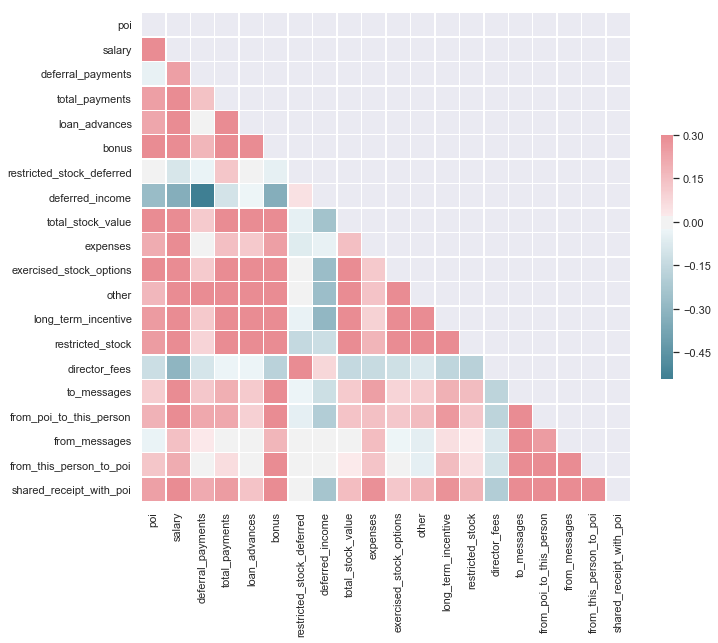

In [55]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Resources

In [43]:
resources = pd.read_csv('resources.csv')

In [44]:
resources

,title,author,url
0,An Introduction to Feature Selection,Jason Brownlee,https://machinelearningmastery.com/an-introduc...
1,A Feature Selection Tool for Machine Learning ...,William Koehrsen,https://towardsdatascience.com/a-feature-selec...
2,Machine Learning with Scikit-Learn - 42 - Auto...,Cristi Vlad,https://www.youtube.com/watch?v=RXFnwCRb-is
3,scikit-learn v0.19.2 Section 1.13 Feature Sele...,NaN,http://scikit-learn.org/stable/modules/feature...
4,The Ultimate Python Seaborn Tutorial,NaN,https://elitedatascience.com/python-seaborn-tu...
5,Plotting a diagonal correlation matrix,Michael Waskom,https://seaborn.pydata.org/examples/many_pairw...
6,Visualization with Seaborn,Jake VanderPlas,https://jakevdp.github.io/PythonDataScienceHan...


In [29]:
resources.iloc[1][2]

'https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0'